In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import subprocess
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
import json

import warnings
warnings.filterwarnings('ignore')

c:\users\priyu\gpu3_5\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("voice.csv",header=0)

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
cols = list(set(list(df.columns)) - set(['label']))
# normalize = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))
# df[cols] = normalize(df[cols])
df["label"] = df.label.map(dict(male=0, female=1))

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [6]:
X_train, val_test_X, y_train, val_test_y = train_test_split(df, df['label'], test_size=0.40, random_state=42)
X_test, X_val, y_test, y_val  = train_test_split(val_test_X, val_test_y, test_size=0.50, random_state=42)

In [7]:
corr = X_train.corr()

In [8]:
corr.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [9]:
corr

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.742185,0.926934,0.911798,0.744584,-0.627064,-0.340516,-0.335350,-0.605807,-0.782918,...,1.000000,0.465938,0.386288,0.280518,0.537855,0.225665,0.532645,0.528752,-0.225514,0.335041
sd,-0.742185,1.000000,-0.571347,-0.842029,-0.171356,0.867073,0.308661,0.339808,0.732107,0.846725,...,-0.742185,-0.475635,-0.360084,-0.148399,-0.495672,-0.348482,-0.493091,-0.486989,0.136866,-0.478311
median,0.926934,-0.571347,1.000000,0.780803,0.733020,-0.483754,-0.289297,-0.278193,-0.500145,-0.657335,...,0.926934,0.413913,0.339457,0.250234,0.460548,0.191176,0.459375,0.456080,-0.220676,0.278054
Q25,0.911798,-0.842029,0.780803,1.000000,0.484699,-0.872879,-0.324018,-0.357182,-0.658507,-0.766602,...,0.911798,0.562901,0.323670,0.208508,0.464374,0.296353,0.460843,0.455665,-0.145704,0.518690
Q75,0.744584,-0.171356,0.733020,0.484699,1.000000,0.003707,-0.233853,-0.174628,-0.171665,-0.375753,...,0.744584,0.155512,0.256147,0.284150,0.353754,-0.021129,0.349138,0.349612,-0.220417,-0.066534
IQR,-0.627064,0.867073,-0.483754,-0.872879,0.003707,1.000000,0.239985,0.310939,0.657086,0.666817,...,-0.627064,-0.556794,-0.227150,-0.079868,-0.333562,-0.350597,-0.332101,-0.325916,0.043620,-0.630117
skew,-0.340516,0.308661,-0.289297,-0.324018,-0.233853,0.239985,1.000000,0.975913,-0.172083,0.094192,...,-0.340516,-0.177288,-0.212056,-0.086899,-0.338474,-0.058508,-0.306339,-0.305376,-0.159776,-0.040213
kurt,-0.335350,0.339808,-0.278193,-0.357182,-0.174628,0.310939,0.975913,1.000000,-0.100049,0.125675,...,-0.335350,-0.208726,-0.201541,-0.053483,-0.303904,-0.102863,-0.273187,-0.271420,-0.198046,-0.096595
sp.ent,-0.605807,0.732107,-0.500145,-0.658507,-0.171665,0.657086,-0.172083,-0.100049,1.000000,0.866627,...,-0.605807,-0.512157,-0.330985,-0.130654,-0.307979,-0.283597,-0.343158,-0.338175,0.206110,-0.484078
sfm,-0.782918,0.846725,-0.657335,-0.766602,-0.375753,0.666817,0.094192,0.125675,0.866627,1.000000,...,-0.782918,-0.420063,-0.382953,-0.203845,-0.437546,-0.276534,-0.453564,-0.448739,0.223098,-0.349920


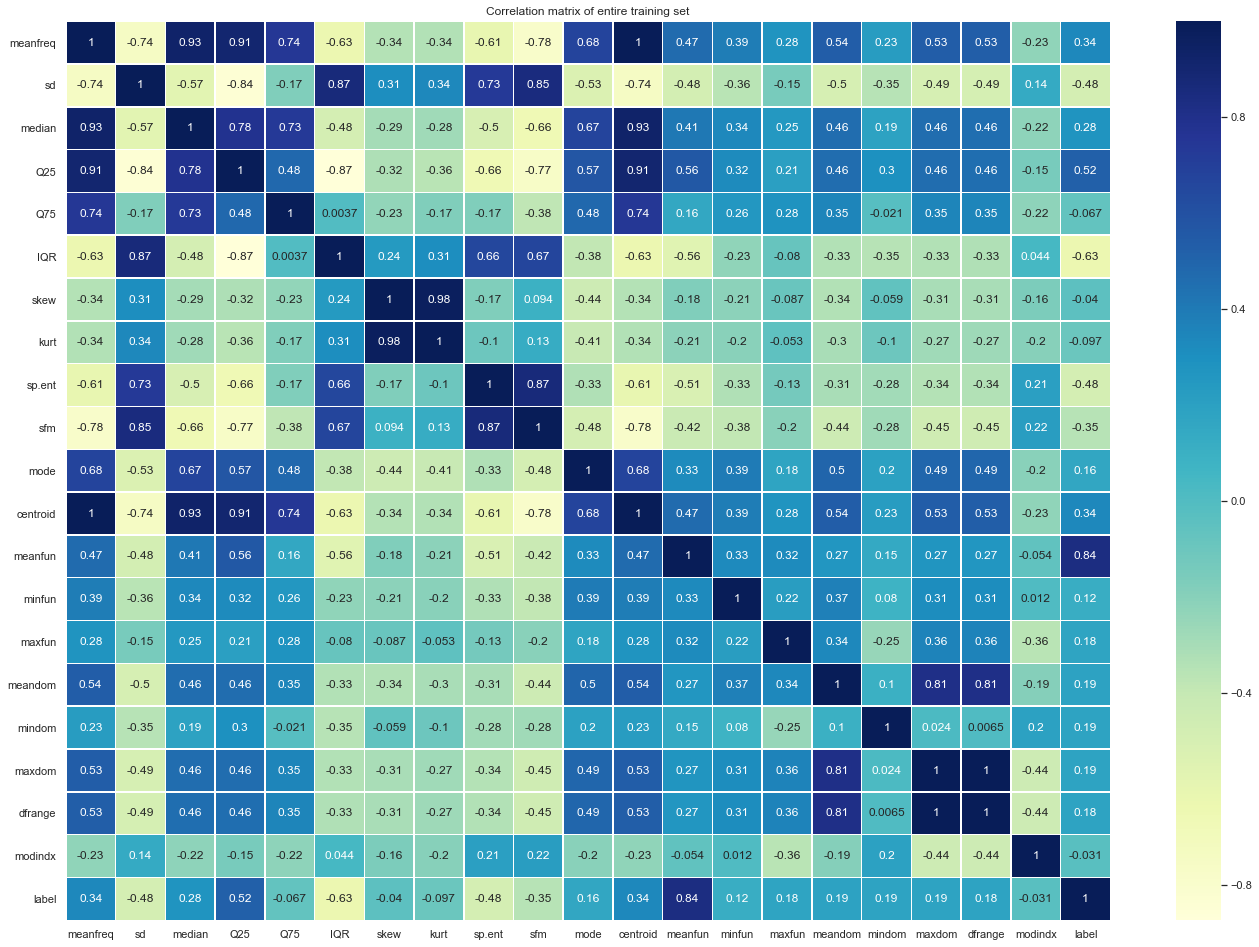

In [10]:
sns.set(rc={'figure.figsize':(11.7 * 2,8.27 * 2)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True,
        linewidths=.5,
        cmap="YlGnBu")

plt.title("Correlation matrix of entire training set")

plt.show()

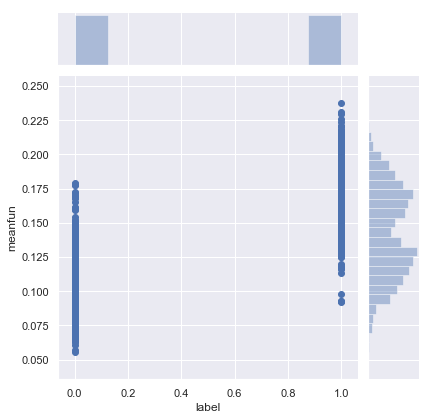

In [11]:
sns.jointplot(x="label", y="meanfun", data=df);


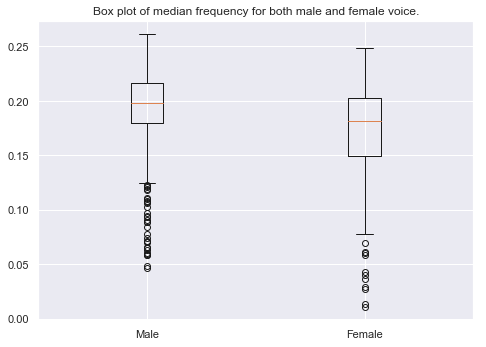

In [12]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
plt.boxplot([X_train[X_train['label'] == 1]['median'],X_train[X_train['label'] == 0]['median']], labels = ['Male' , 'Female'])
plt.title("Box plot of median frequency for both male and female voice.")
plt.show()

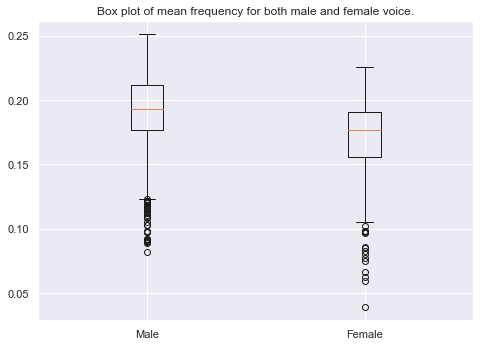

In [13]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
plt.boxplot([X_train[X_train['label'] == 1]['meanfreq'],X_train[X_train['label'] == 0]['meanfreq']], labels = ['Male' , 'Female'])
plt.title("Box plot of mean frequency for both male and female voice.")
plt.show()

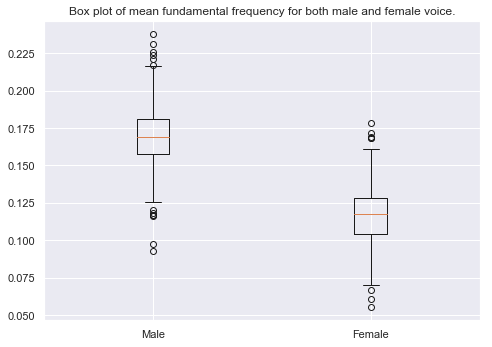

In [14]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
plt.boxplot([X_train[X_train['label'] == 1]['meanfun'],X_train[X_train['label'] == 0]['meanfun']],labels = ['Male' , 'Female'])
plt.title("Box plot of mean fundamental frequency for both male and female voice.")
plt.show()

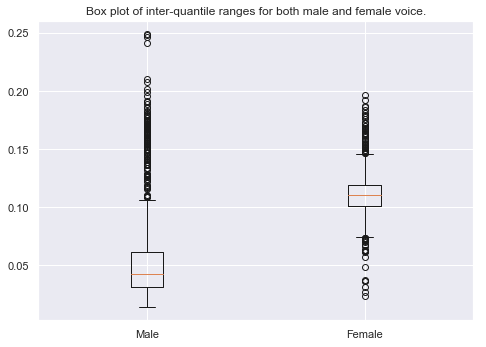

In [15]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
plt.boxplot([X_train[X_train['label'] == 1]['IQR'],X_train[X_train['label'] == 0]['IQR']], labels = ['Male' , 'Female'])
plt.title("Box plot of inter-quantile ranges for both male and female voice.")
plt.show()

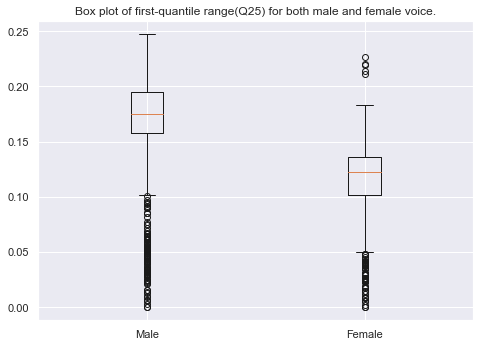

In [16]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
plt.boxplot([X_train[X_train['label'] == 1]['Q25'],X_train[X_train['label'] == 0]['Q25']], labels = ['Male' , 'Female'])
plt.title("Box plot of first-quantile range(Q25) for both male and female voice.")
plt.show()

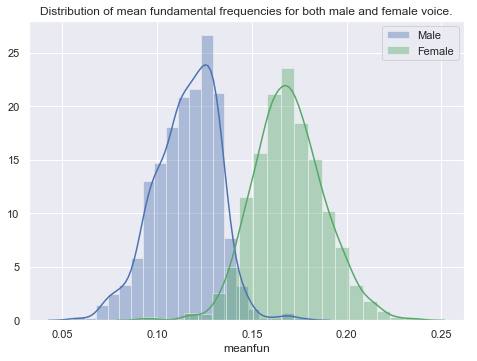

In [17]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
sns.distplot(X_train[X_train['label'] == 0]['meanfun'], label = "Male", color='b' , bins=20);
sns.distplot(X_train[X_train['label'] == 1]['meanfun'], label = "Female", color='g', bins=20);
plt.legend()
plt.title("Distribution of mean fundamental frequencies for both male and female voice.")
plt.show()

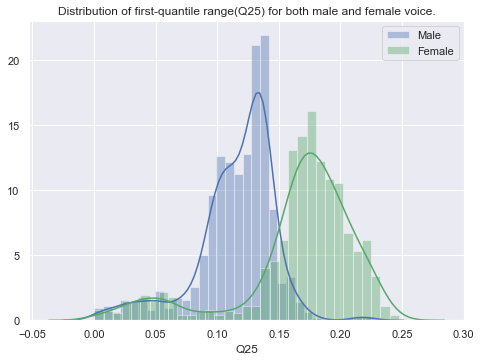

In [18]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
sns.distplot(X_train[X_train['label'] == 0]['Q25'], label = "Male", color='b');
sns.distplot(X_train[X_train['label'] == 1]['Q25'], label = "Female", color='g');
plt.title("Distribution of first-quantile range(Q25) for both male and female voice.")
plt.legend()
plt.show()

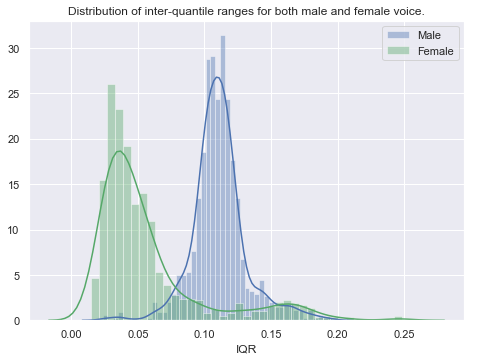

In [19]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
sns.distplot(X_train[X_train['label'] == 0]['IQR'], label = "Male", color='b');
sns.distplot(X_train[X_train['label'] == 1]['IQR'], label = "Female", color='g');
plt.title("Distribution of inter-quantile ranges for both male and female voice.")
plt.legend()
plt.show()

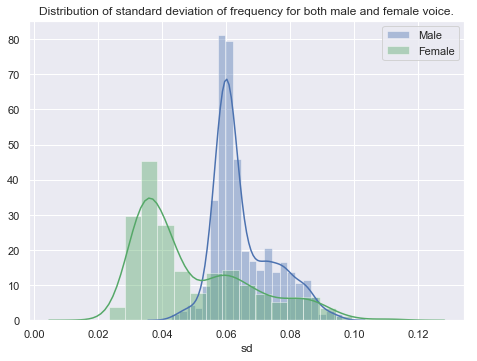

In [20]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
sns.distplot(X_train[X_train['label'] == 0]['sd'], label = "Male", color='b');
sns.distplot(X_train[X_train['label'] == 1]['sd'], label = "Female", color='g');
plt.title("Distribution of standard deviation of frequency for both male and female voice.")

plt.legend()
plt.show()

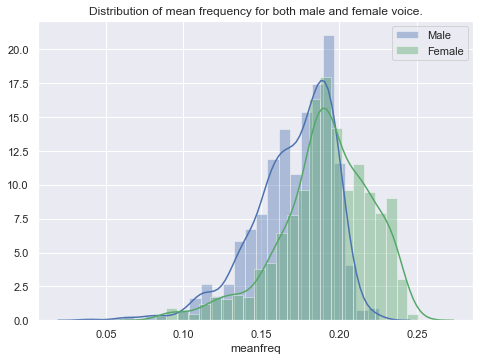

In [21]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
sns.distplot(X_train[X_train['label'] == 0]['meanfreq'], label = "Male", color='b');
sns.distplot(X_train[X_train['label'] == 1]['meanfreq'], label = "Female", color='g');
plt.title("Distribution of mean frequency for both male and female voice.")
plt.legend()
plt.show()

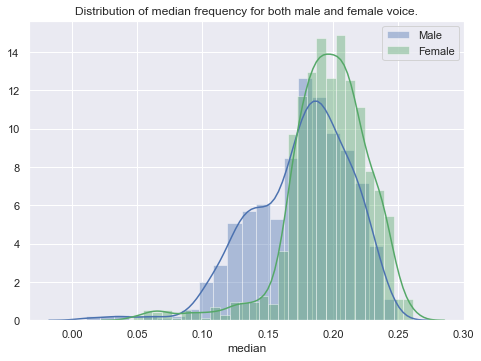

In [22]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
sns.distplot(X_train[X_train['label'] == 0]['median'], label = "Male", color='b');
sns.distplot(X_train[X_train['label'] == 1]['median'], label = "Female", color='g');
plt.title("Distribution of median frequency for both male and female voice.")
plt.legend()
plt.show()

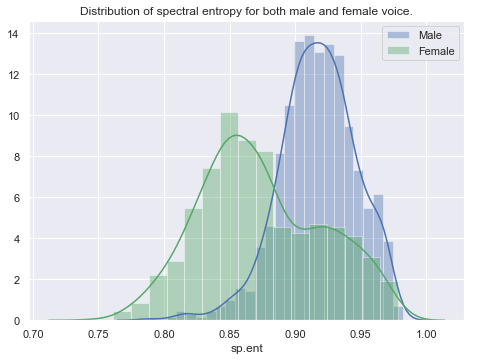

In [23]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})
sns.distplot(X_train[X_train['label'] == 0]['sp.ent'], label = "Male", color='b');
sns.distplot(X_train[X_train['label'] == 1]['sp.ent'], label = "Female", color='g');
plt.title("Distribution of spectral entropy for both male and female voice.")

plt.legend()
plt.show()

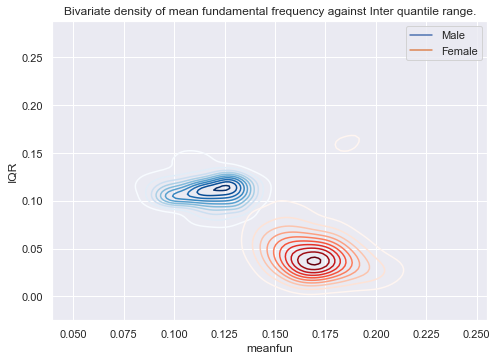

In [24]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})

male = X_train.loc[X_train['label'] == 0]
female = X_train.loc[X_train['label'] == 1]
sns.kdeplot(male['meanfun'], male['IQR'], cmap="Blues", shade=False, shade_lowest=False, label="Male")
sns.kdeplot(female['meanfun'], female['IQR'], cmap="Reds", shade=False, shade_lowest=False, label="Female")
plt.legend()
plt.title("Bivariate density of mean fundamental frequency against Inter quantile range.")
plt.show()

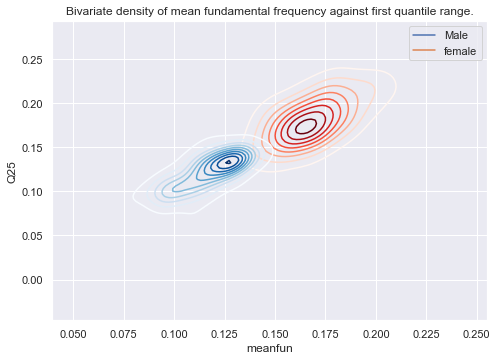

In [25]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})

male = X_train.loc[X_train['label'] == 0]
female = X_train.loc[X_train['label'] == 1]
sns.kdeplot(female['meanfun'], female['Q25'], cmap="Reds", shade=False, shade_lowest=False, label="Male")
sns.kdeplot(male['meanfun'], male['Q25'], cmap="Blues", shade=False, shade_lowest=False, label="female")
plt.legend()
plt.title("Bivariate density of mean fundamental frequency against first quantile range.")

plt.show()

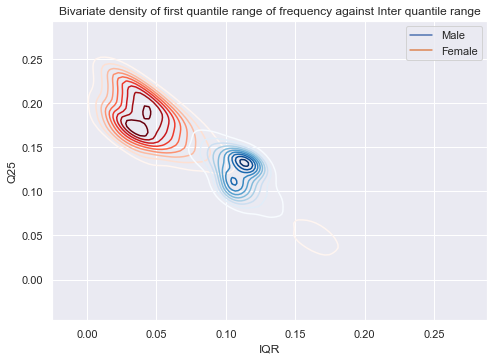

In [26]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})

male = X_train.loc[X_train['label'] == 0]
female = X_train.loc[X_train['label'] == 1]
sns.kdeplot(female['IQR'], female['Q25'], cmap="Reds", shade=False, shade_lowest=False, label="Male")
sns.kdeplot(male['IQR'], male['Q25'], cmap="Blues", shade=False, shade_lowest=False, label="Female")
plt.title("Bivariate density of first quantile range of frequency against Inter quantile range")
plt.legend()

plt.show()

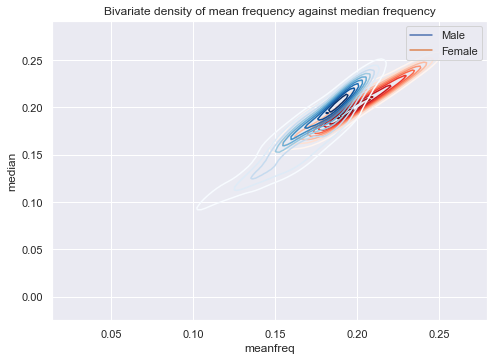

In [27]:
sns.set(rc={'figure.figsize':(11.7/1.5,8.27/1.5)})

male = X_train.loc[X_train['label'] == 0]
female = X_train.loc[X_train['label'] == 1]
sns.kdeplot(female['meanfreq'], female['median'], cmap="Reds", shade=False, shade_lowest=False, label="Male")
sns.kdeplot(male['meanfreq'], male['median'], cmap="Blues", shade=False, shade_lowest=False, label="Female")
plt.title("Bivariate density of mean frequency against median frequency")
plt.legend()

plt.show()

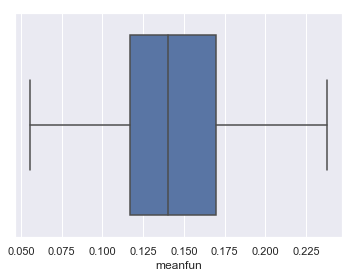

In [28]:
sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.boxplot(x = df['meanfun'])

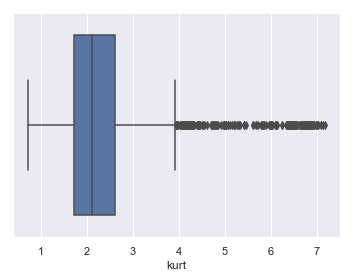

In [29]:
sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.boxplot(x = np.log(df["kurt"]))
plt.show()

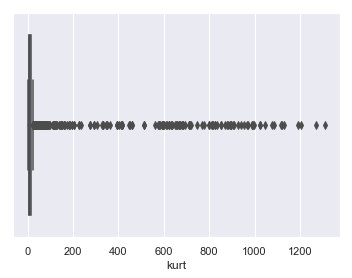

In [30]:
sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.boxplot(x = df["kurt"])
plt.show()

In [31]:
sum(df["meanfreq"] < 0.25)

3167

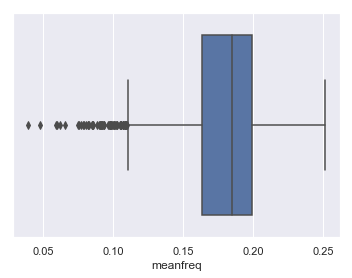

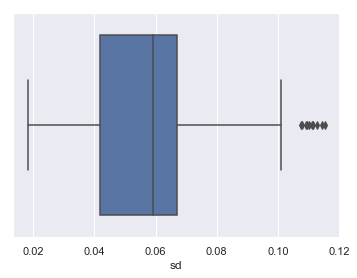

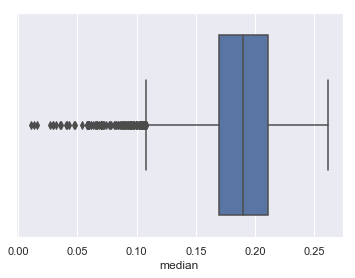

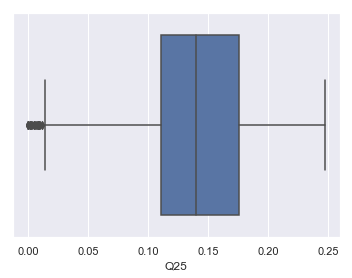

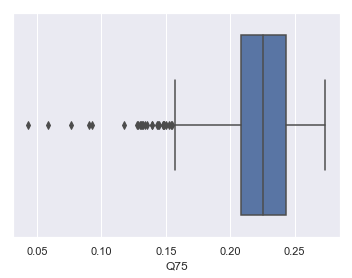

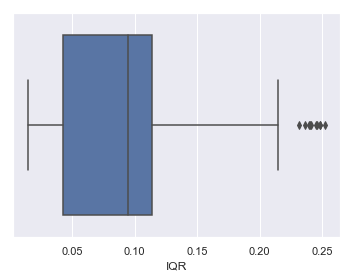

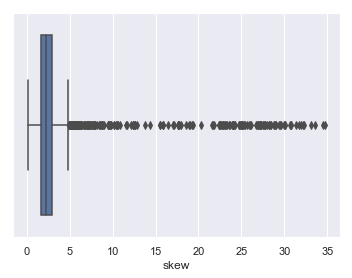

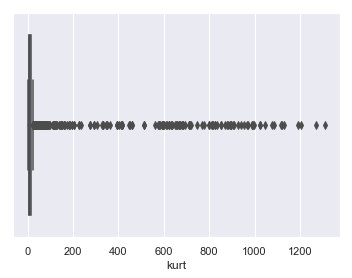

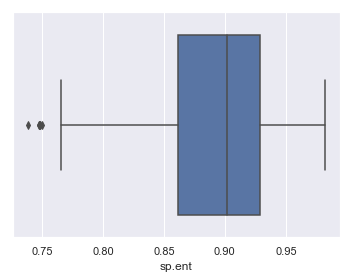

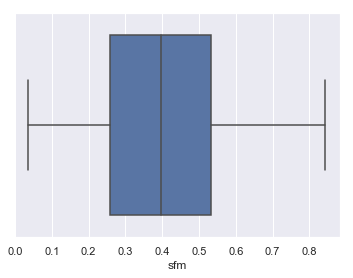

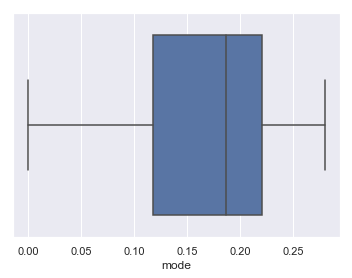

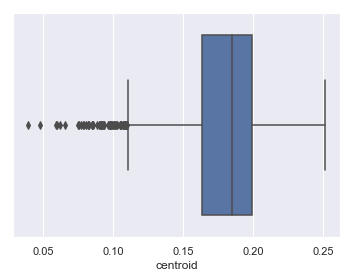

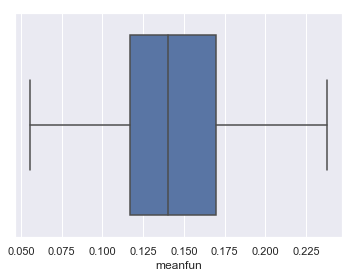

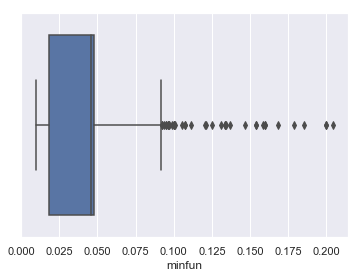

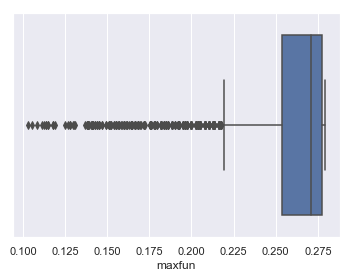

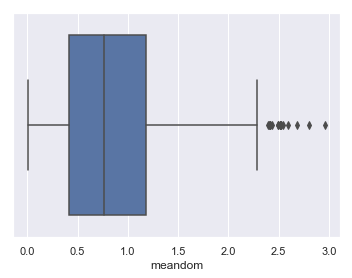

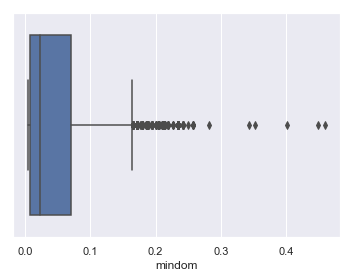

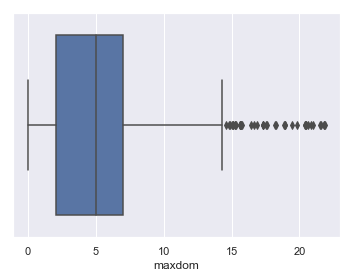

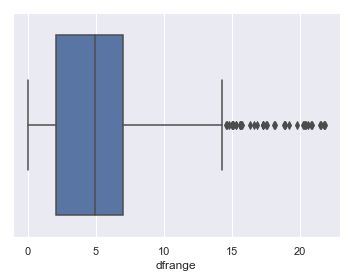

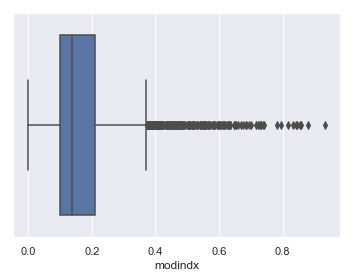

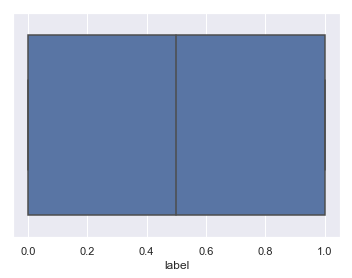

In [32]:
for column in df.columns:
    sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
    sns.boxplot(x = df[column])
    plt.show()

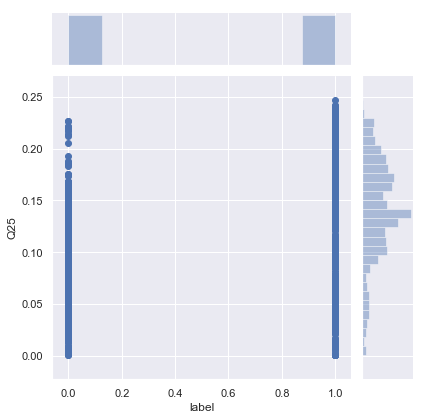

In [33]:
sns.jointplot(x="label", y="Q25", data=df);

In [34]:
X_train, val_test_X, y_train, val_test_y = train_test_split(df, df['label'], test_size=0.40, random_state=42)

In [35]:
X_test, X_val, y_test, y_val  = train_test_split(val_test_X, val_test_y, test_size=0.50, random_state=42)

In [36]:
accuracies = {}

# accuracies without any tranformation

In [37]:
cols = list(set(df.columns) - set(['label']))
cols

svmclf = SVC(kernel='linear')
svmclf.fit(X_train[cols], y_train)

print("Support vector machines train Score: ",svmclf.score(X_train[cols],y_train))
print("Support vector machines test Score: ",svmclf.score(X_test[cols],y_test))
print("\n")


accuracies['svc'] = {
    'train' : [],
    'test' : []
}
accuracies['svc']['train'].append(svmclf.score(X_train[cols],y_train))
accuracies['svc']['test'].append(svmclf.score(X_test[cols],y_test))


clf = BernoulliNB()
clf.fit(X_train[cols],y_train)
print("Bernoulli naive bayes train Score: ",clf.score(X_train[cols],y_train))
print("Bernoulli naive bayes test Score: ",clf.score(X_test[cols],y_test))
print("\n")



accuracies['BernoulliNB'] = {
    'train' : [],
    'test' : []
}
accuracies['BernoulliNB']['train'].append(clf.score(X_train[cols],y_train))
accuracies['BernoulliNB']['test'].append(clf.score(X_test[cols],y_test))


gnb = GaussianNB()
gnb.fit(X_train[cols],y_train)
print("Gaussian naive bayes train Score: ", gnb.score(X_train[cols],y_train))
print("Gaussian naive bayes test Score: ",gnb.score(X_test[cols],y_test))
print("\n")

accuracies['GaussianNB'] = {
    'train' : [],
    'test' : []
}
accuracies['GaussianNB']['train'].append(gnb.score(X_train[cols],y_train))
accuracies['GaussianNB']['test'].append(gnb.score(X_test[cols],y_test))




dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train[cols],y_train)

print("Decision Tree Classification train Score: ",dec_tree.score(X_train[cols],y_train))
print("Decision Tree Classification test Score: ",dec_tree.score(X_test[cols],y_test))
print("\n")


accuracies['DecisionTreeClassifier'] = {
    'train' : [],
    'test' : []
}
accuracies['DecisionTreeClassifier']['train'].append(dec_tree.score(X_train[cols],y_train))
accuracies['DecisionTreeClassifier']['test'].append(dec_tree.score(X_test[cols],y_test))





rand_forest = RandomForestClassifier(n_estimators=20, random_state=42)
rand_forest.fit(X_train[cols],y_train)
print("Random Forest Classification Score: ",rand_forest.score(X_train[cols],y_train))
print("Random Forest Classification Score: ",rand_forest.score(X_test[cols],y_test))
print("\n")


accuracies['rand_forest'] = {
    'train' : [],
    'test' : []
}
accuracies['rand_forest']['train'].append(rand_forest.score(X_train[cols],y_train))
accuracies['rand_forest']['test'].append(rand_forest.score(X_test[cols],y_test))




gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train[cols],y_train)
print("Gradient Boosting Classifier Score: ",gbc.score(X_train[cols],y_train))
print("Gradient Boosting Classifier Score: ",gbc.score(X_test[cols],y_test))
print("\n")

accuracies['GradientBoostingClassifier'] = {
    'train' : [],
    'test' : []
}
accuracies['GradientBoostingClassifier']['train'].append(gbc.score(X_train[cols],y_train))
accuracies['GradientBoostingClassifier']['test'].append(gbc.score(X_test[cols],y_test))




Support vector machines train Score:  0.9168421052631579
Support vector machines test Score:  0.9053627760252366


Bernoulli naive bayes train Score:  0.5368421052631579
Bernoulli naive bayes test Score:  0.501577287066246


Gaussian naive bayes train Score:  0.8873684210526316
Gaussian naive bayes test Score:  0.88801261829653


Decision Tree Classification train Score:  1.0
Decision Tree Classification test Score:  0.9668769716088328


Random Forest Classification Score:  0.9994736842105263
Random Forest Classification Score:  0.973186119873817


Gradient Boosting Classifier Score:  0.998421052631579
Gradient Boosting Classifier Score:  0.9763406940063092




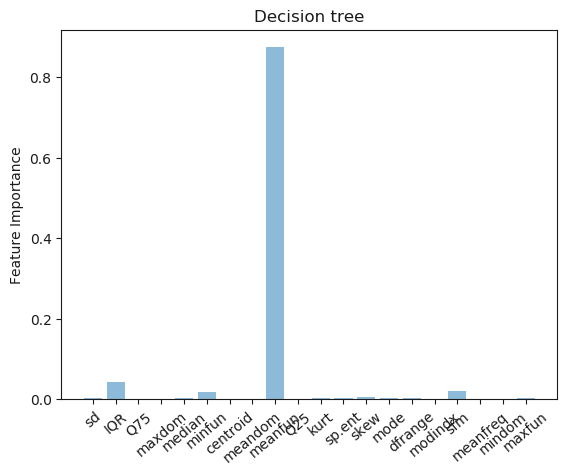

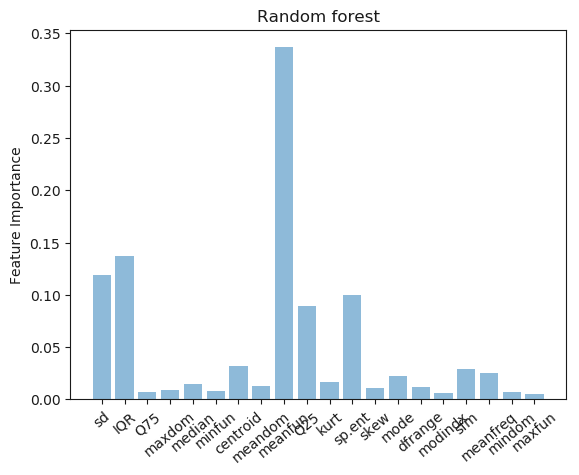

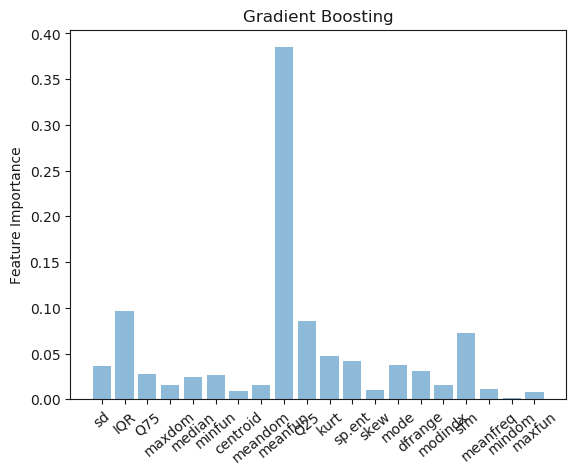

In [38]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = cols
y_pos = np.arange(len(objects))
performance = dec_tree.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Decision tree')
plt.xticks(rotation=40)

plt.show()


objects = cols
y_pos = np.arange(len(objects))
performance = rand_forest.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Random forest')
plt.xticks(rotation=40)

plt.show()


objects = cols
y_pos = np.arange(len(objects))
performance = gbc.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Gradient Boosting')
plt.xticks(rotation=40)

plt.show()


# accuracies after removing useless variable

In [39]:
cols = list(set(df.columns) - set(['meanfreq', 'label', 'mode', 'minfun', 'maxfun', 'mindom', 'meandom', 'dfrange', 'maxdom']))

svmclf = SVC(kernel='linear')
svmclf.fit(X_train[cols], y_train)

print("Support vector machines train Score: ",svmclf.score(X_train[cols],y_train))
print("Support vector machines test Score: ",svmclf.score(X_test[cols],y_test))
print("\n")


clf = BernoulliNB()
clf.fit(X_train[cols],y_train)
print("Bernoulli naive bayes train Score: ",clf.score(X_train[cols],y_train))
print("Bernoulli naive bayes test Score: ",clf.score(X_test[cols],y_test))
print("\n")



gnb = GaussianNB()
gnb.fit(X_train[cols],y_train)
print("Gaussian naive bayes train Score: ", gnb.score(X_train[cols],y_train))
print("Gaussian naive bayes test Score: ",gnb.score(X_test[cols],y_test))
print("\n")



dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train[cols],y_train)

print("Decision Tree Classification train Score: ",dec_tree.score(X_train[cols],y_train))
print("Decision Tree Classification test Score: ",dec_tree.score(X_test[cols],y_test))
print("\n")




rand_forest = RandomForestClassifier(n_estimators=20, random_state=42)
rand_forest.fit(X_train[cols],y_train)
print("Random Forest Classification Score: ",rand_forest.score(X_train[cols],y_train))
print("Random Forest Classification Score: ",rand_forest.score(X_test[cols],y_test))
print("\n")


gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train[cols],y_train)
print("Gradient Boosting Classifier Score: ",gbc.score(X_train[cols],y_train))
print("Gradient Boosting Classifier Score: ",gbc.score(X_test[cols],y_test))
print("\n")


accuracies['svc']['train'].append(svmclf.score(X_train[cols],y_train))
accuracies['svc']['test'].append(svmclf.score(X_test[cols],y_test))

accuracies['BernoulliNB']['train'].append(clf.score(X_train[cols],y_train))
accuracies['BernoulliNB']['test'].append(clf.score(X_test[cols],y_test))

accuracies['GaussianNB']['train'].append(gnb.score(X_train[cols],y_train))
accuracies['GaussianNB']['test'].append(gnb.score(X_test[cols],y_test))

accuracies['DecisionTreeClassifier']['train'].append(dec_tree.score(X_train[cols],y_train))
accuracies['DecisionTreeClassifier']['test'].append(dec_tree.score(X_test[cols],y_test))

accuracies['rand_forest']['train'].append(rand_forest.score(X_train[cols],y_train))
accuracies['rand_forest']['test'].append(rand_forest.score(X_test[cols],y_test))

accuracies['GradientBoostingClassifier']['train'].append(gbc.score(X_train[cols],y_train))
accuracies['GradientBoostingClassifier']['test'].append(gbc.score(X_test[cols],y_test))


Support vector machines train Score:  0.9163157894736842
Support vector machines test Score:  0.9053627760252366


Bernoulli naive bayes train Score:  0.5189473684210526
Bernoulli naive bayes test Score:  0.4810725552050473


Gaussian naive bayes train Score:  0.9273684210526316
Gaussian naive bayes test Score:  0.9258675078864353


Decision Tree Classification train Score:  1.0
Decision Tree Classification test Score:  0.9652996845425867


Random Forest Classification Score:  1.0
Random Forest Classification Score:  0.9763406940063092


Gradient Boosting Classifier Score:  0.9978947368421053
Gradient Boosting Classifier Score:  0.9747634069400631




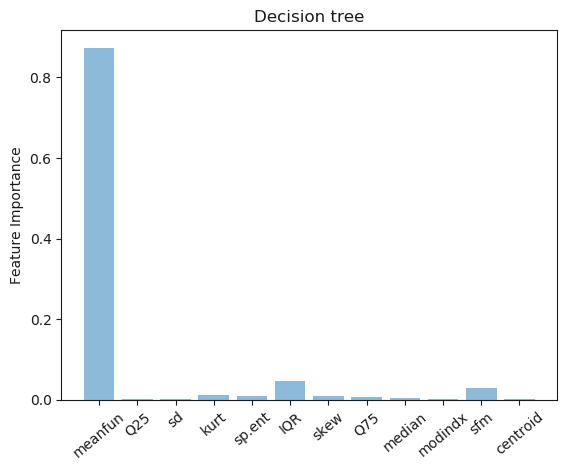

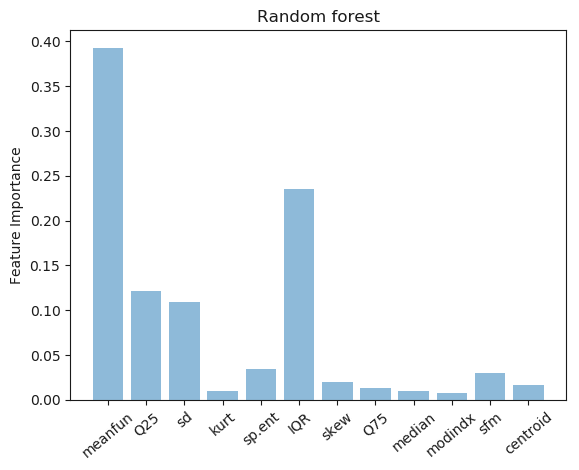

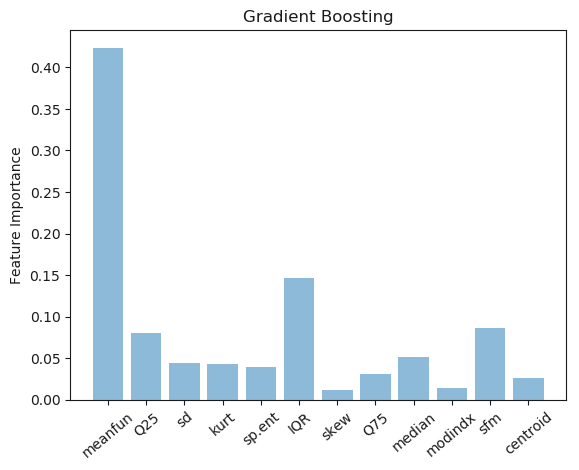

In [40]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = cols
y_pos = np.arange(len(objects))
performance = dec_tree.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Decision tree')
plt.xticks(rotation=40)

plt.show()


objects = cols
y_pos = np.arange(len(objects))
performance = rand_forest.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Random forest')
plt.xticks(rotation=40)

plt.show()


objects = cols
y_pos = np.arange(len(objects))
performance = gbc.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Gradient Boosting')
plt.xticks(rotation=40)

plt.show()


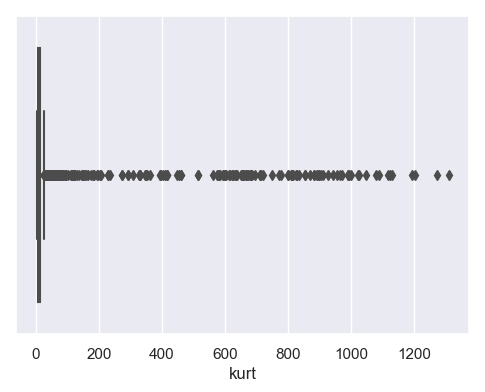

In [41]:
sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.boxplot(x = df["kurt"])
plt.show()

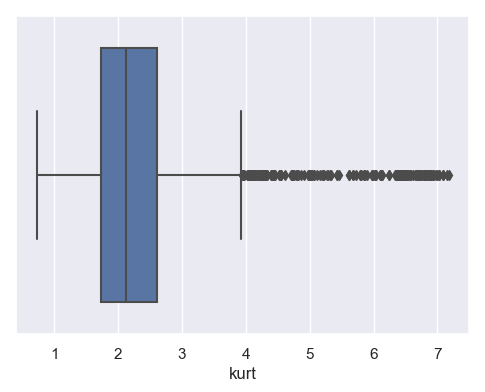

In [42]:
# applying log transformation to deal with outliers 

sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.boxplot(x = np.log(df["kurt"]))
plt.show()

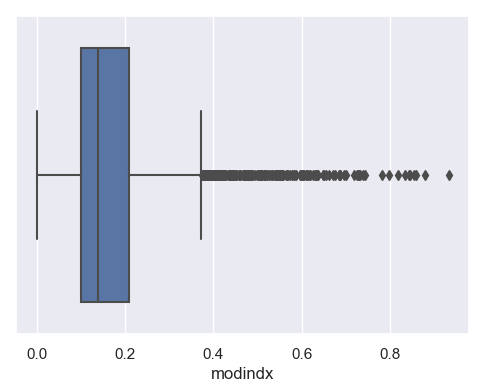

In [43]:
sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.boxplot(x = df["modindx"])
plt.show()

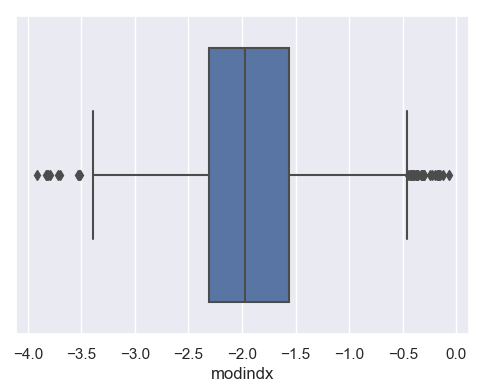

In [44]:
sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.boxplot(x = np.log(df["modindx"]))
plt.show()

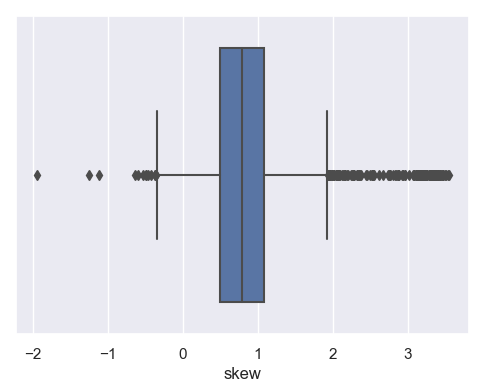

In [45]:
sns.set(rc={'figure.figsize':(11.7/2,8.27/2)})
sns.boxplot(x = np.log(df["skew"]))
plt.show()

In [46]:
X_train['kurt'].values

array([10.61469093,  3.95705498,  2.75765618, ...,  6.68179878,
        4.00929469,  3.10328243])

In [47]:
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3036,0.206474,0.036387,0.211982,0.194361,0.228194,0.033833,2.785813,10.614691,0.828776,0.204422,...,0.206474,0.203335,0.087719,0.250000,0.367383,0.195312,0.795898,0.600586,0.327051,1
1606,0.160745,0.090561,0.189495,0.061751,0.243232,0.181481,1.181424,3.957055,0.958113,0.724561,...,0.160745,0.193687,0.057348,0.258065,0.462358,0.023438,0.742188,0.718750,0.246739,1
1338,0.177326,0.064391,0.186322,0.134566,0.230832,0.096266,0.804913,2.757656,0.948078,0.620633,...,0.177326,0.113783,0.047059,0.277457,0.863281,0.023438,4.218750,4.195312,0.156948,0
843,0.168164,0.066334,0.179142,0.110463,0.213242,0.102779,1.637325,6.351842,0.950347,0.666764,...,0.168164,0.131662,0.050580,0.279070,1.038462,0.023438,7.007812,6.984375,0.132177,0
1963,0.121076,0.086413,0.140828,0.028718,0.197988,0.169270,1.589307,5.204647,0.950290,0.686228,...,0.121076,0.166991,0.019632,0.271186,0.322917,0.015625,0.710938,0.695312,0.416595,1


In [48]:
X_train['log-kurt'] = np.log(X_train['kurt'])
X_test['log-kurt'] = np.log(X_test['kurt'])
X_val['log-kurt'] = np.log(X_val['kurt'])

X_train['log-skew'] = np.log(X_train['skew'])
X_test['log-skew'] = np.log(X_test['skew'])
X_val['log-skew'] = np.log(X_val['skew'])


print(X_train['log-skew'][np.isnan(X_train['log-skew']) == True])
print(X_train['log-kurt'][np.isnan(X_train['log-kurt']) == True])


cols = list(set(X_train.columns) - set(['meanfreq','label', 'mode', 'minfun', 'maxfun', 
                                   'mindom', 'meandom', 'dfrange', 
                                   'maxdom','kurt', 'skew']))
print(cols)

svmclf = SVC(kernel='linear')
svmclf.fit(X_train[cols], y_train)

print("Support vector machines train Score: ",svmclf.score(X_train[cols],y_train))
print("Support vector machines test Score: ",svmclf.score(X_test[cols],y_test))
print("\n")


clf = BernoulliNB()
clf.fit(X_train[cols],y_train)
print("Bernoulli naive bayes train Score: ",clf.score(X_train[cols],y_train))
print("Bernoulli naive bayes test Score: ",clf.score(X_test[cols],y_test))
print("\n")



gnb = GaussianNB()
gnb.fit(X_train[cols],y_train)
print("Gaussian naive bayes train Score: ", gnb.score(X_train[cols],y_train))
print("Gaussian naive bayes test Score: ",gnb.score(X_test[cols],y_test))
print("\n")



dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train[cols],y_train)

print("Decision Tree Classification train Score: ",dec_tree.score(X_train[cols],y_train))
print("Decision Tree Classification test Score: ",dec_tree.score(X_test[cols],y_test))
print("\n")




rand_forest = RandomForestClassifier(n_estimators=20, random_state=42)
rand_forest.fit(X_train[cols],y_train)
print("Random Forest Classification Score: ",rand_forest.score(X_train[cols],y_train))
print("Random Forest Classification Score: ",rand_forest.score(X_test[cols],y_test))
print("\n")


gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train[cols],y_train)
print("Gradient Boosting Classifier Score: ",gbc.score(X_train[cols],y_train))
print("Gradient Boosting Classifier Score: ",gbc.score(X_test[cols],y_test))
print("\n")


accuracies['svc']['train'].append(svmclf.score(X_train[cols],y_train))
accuracies['svc']['test'].append(svmclf.score(X_test[cols],y_test))

accuracies['BernoulliNB']['train'].append(clf.score(X_train[cols],y_train))
accuracies['BernoulliNB']['test'].append(clf.score(X_test[cols],y_test))

accuracies['GaussianNB']['train'].append(gnb.score(X_train[cols],y_train))
accuracies['GaussianNB']['test'].append(gnb.score(X_test[cols],y_test))

accuracies['DecisionTreeClassifier']['train'].append(dec_tree.score(X_train[cols],y_train))
accuracies['DecisionTreeClassifier']['test'].append(dec_tree.score(X_test[cols],y_test))

accuracies['rand_forest']['train'].append(rand_forest.score(X_train[cols],y_train))
accuracies['rand_forest']['test'].append(rand_forest.score(X_test[cols],y_test))

accuracies['GradientBoostingClassifier']['train'].append(gbc.score(X_train[cols],y_train))
accuracies['GradientBoostingClassifier']['test'].append(gbc.score(X_test[cols],y_test))


Series([], Name: log-skew, dtype: float64)
Series([], Name: log-kurt, dtype: float64)
['meanfun', 'Q25', 'sd', 'IQR', 'sp.ent', 'Q75', 'median', 'log-skew', 'modindx', 'sfm', 'log-kurt', 'centroid']
Support vector machines train Score:  0.9147368421052632
Support vector machines test Score:  0.9037854889589906


Bernoulli naive bayes train Score:  0.5321052631578947
Bernoulli naive bayes test Score:  0.49842271293375395


Gaussian naive bayes train Score:  0.9294736842105263
Gaussian naive bayes test Score:  0.9369085173501577


Decision Tree Classification train Score:  1.0
Decision Tree Classification test Score:  0.9684542586750788


Random Forest Classification Score:  1.0
Random Forest Classification Score:  0.9779179810725552


Gradient Boosting Classifier Score:  0.9978947368421053
Gradient Boosting Classifier Score:  0.9747634069400631




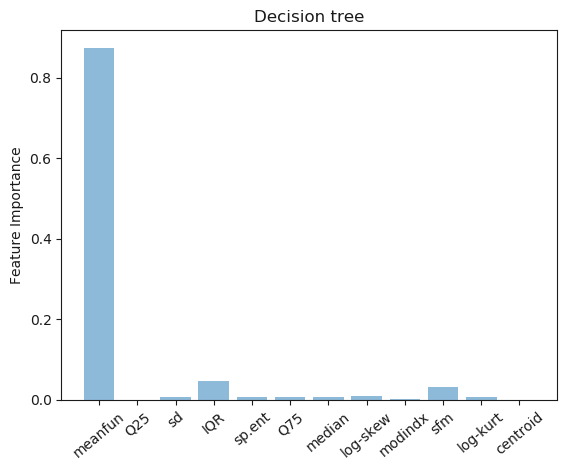

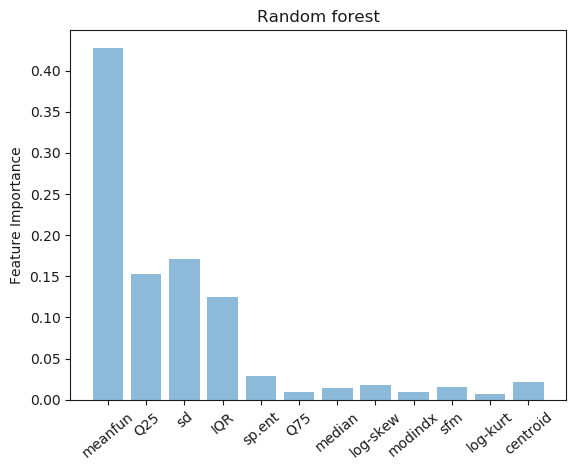

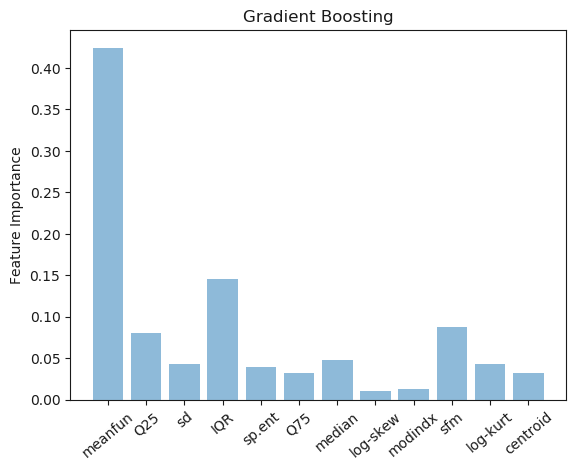

In [49]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = cols
y_pos = np.arange(len(objects))
performance = dec_tree.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Decision tree')
plt.xticks(rotation=40)

plt.show()


objects = cols
y_pos = np.arange(len(objects))
performance = rand_forest.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Random forest')
plt.xticks(rotation=40)

plt.show()


objects = cols
y_pos = np.arange(len(objects))
performance = gbc.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Gradient Boosting')
plt.xticks(rotation=40)

plt.show()


In [50]:
cols = list(set(X_train.columns) - set(['meanfreq', 'label', 'mode', 'minfun', 'maxfun', 
                                   'mindom', 'meandom', 'dfrange', 
                                   'maxdom', 'kurt', 'skew',
                                   'median', 'centroid', 'sp.ent']))

svmclf = SVC(kernel='linear')
svmclf.fit(X_train[cols], y_train)

print("Support vector machines train Score: ",svmclf.score(X_train[cols],y_train))
print("Support vector machines test Score: ",svmclf.score(X_test[cols],y_test))
print("\n")


clf = BernoulliNB()
clf.fit(X_train[cols],y_train)
print("Bernoulli naive bayes train Score: ",clf.score(X_train[cols],y_train))
print("Bernoulli naive bayes test Score: ",clf.score(X_test[cols],y_test))
print("\n")



gnb = GaussianNB()
gnb.fit(X_train[cols],y_train)
print("Gaussian naive bayes train Score: ", gnb.score(X_train[cols],y_train))
print("Gaussian naive bayes test Score: ",gnb.score(X_test[cols],y_test))
print("\n")



dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train[cols],y_train)

print("Decision Tree Classification train Score: ",dec_tree.score(X_train[cols],y_train))
print("Decision Tree Classification test Score: ",dec_tree.score(X_test[cols],y_test))
print("\n")




rand_forest = RandomForestClassifier(n_estimators=20, random_state=42)
rand_forest.fit(X_train[cols],y_train)
print("Random Forest Classification Score: ",rand_forest.score(X_train[cols],y_train))
print("Random Forest Classification Score: ",rand_forest.score(X_test[cols],y_test))
print("\n")


gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train[cols],y_train)
print("Gradient Boosting Classifier Score: ",gbc.score(X_train[cols],y_train))
print("Gradient Boosting Classifier Score: ",gbc.score(X_test[cols],y_test))
print("\n")


accuracies['svc']['train'].append(svmclf.score(X_train[cols],y_train))
accuracies['svc']['test'].append(svmclf.score(X_test[cols],y_test))

accuracies['BernoulliNB']['train'].append(clf.score(X_train[cols],y_train))
accuracies['BernoulliNB']['test'].append(clf.score(X_test[cols],y_test))

accuracies['GaussianNB']['train'].append(gnb.score(X_train[cols],y_train))
accuracies['GaussianNB']['test'].append(gnb.score(X_test[cols],y_test))

accuracies['DecisionTreeClassifier']['train'].append(dec_tree.score(X_train[cols],y_train))
accuracies['DecisionTreeClassifier']['test'].append(dec_tree.score(X_test[cols],y_test))

accuracies['rand_forest']['train'].append(rand_forest.score(X_train[cols],y_train))
accuracies['rand_forest']['test'].append(rand_forest.score(X_test[cols],y_test))

accuracies['GradientBoostingClassifier']['train'].append(gbc.score(X_train[cols],y_train))
accuracies['GradientBoostingClassifier']['test'].append(gbc.score(X_test[cols],y_test))



Support vector machines train Score:  0.9178947368421052
Support vector machines test Score:  0.9053627760252366


Bernoulli naive bayes train Score:  0.5321052631578947
Bernoulli naive bayes test Score:  0.49842271293375395


Gaussian naive bayes train Score:  0.9515789473684211
Gaussian naive bayes test Score:  0.9463722397476341


Decision Tree Classification train Score:  1.0
Decision Tree Classification test Score:  0.9684542586750788


Random Forest Classification Score:  0.9994736842105263
Random Forest Classification Score:  0.9794952681388013


Gradient Boosting Classifier Score:  0.9968421052631579
Gradient Boosting Classifier Score:  0.9763406940063092




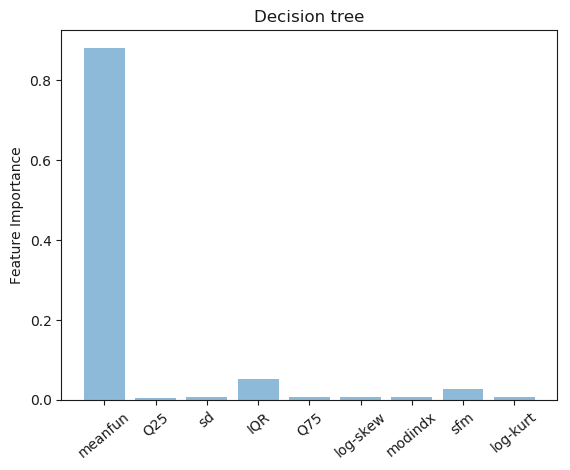

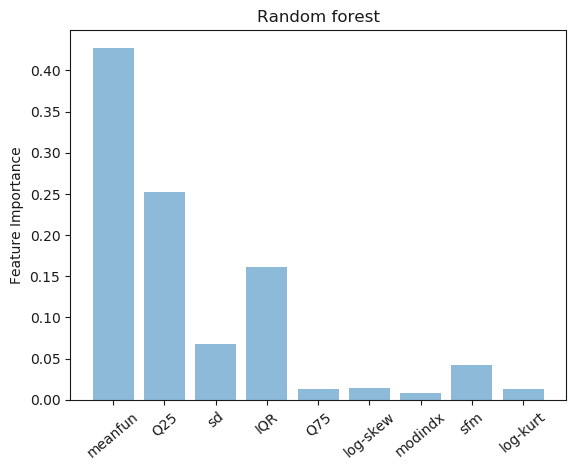

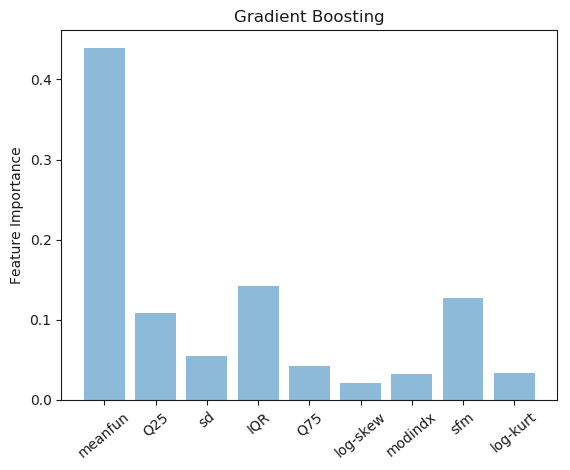

In [51]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = cols
y_pos = np.arange(len(objects))
performance = dec_tree.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Decision tree')
plt.xticks(rotation=40)

plt.show()


objects = cols
y_pos = np.arange(len(objects))
performance = rand_forest.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Random forest')
plt.xticks(rotation=40)

plt.show()


objects = cols
y_pos = np.arange(len(objects))
performance = gbc.feature_importances_
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Feature Importance')
plt.title('Gradient Boosting')
plt.xticks(rotation=40)

plt.show()


In [52]:
accuracies

{'BernoulliNB': {'test': [0.501577287066246,
   0.4810725552050473,
   0.49842271293375395,
   0.49842271293375395],
  'train': [0.5368421052631579,
   0.5189473684210526,
   0.5321052631578947,
   0.5321052631578947]},
 'DecisionTreeClassifier': {'test': [0.9668769716088328,
   0.9652996845425867,
   0.9684542586750788,
   0.9684542586750788],
  'train': [1.0, 1.0, 1.0, 1.0]},
 'GaussianNB': {'test': [0.88801261829653,
   0.9258675078864353,
   0.9369085173501577,
   0.9463722397476341],
  'train': [0.8873684210526316,
   0.9273684210526316,
   0.9294736842105263,
   0.9515789473684211]},
 'GradientBoostingClassifier': {'test': [0.9763406940063092,
   0.9747634069400631,
   0.9747634069400631,
   0.9763406940063092],
  'train': [0.998421052631579,
   0.9978947368421053,
   0.9978947368421053,
   0.9968421052631579]},
 'rand_forest': {'test': [0.973186119873817,
   0.9763406940063092,
   0.9779179810725552,
   0.9794952681388013],
  'train': [0.9994736842105263, 1.0, 1.0, 0.99947368421

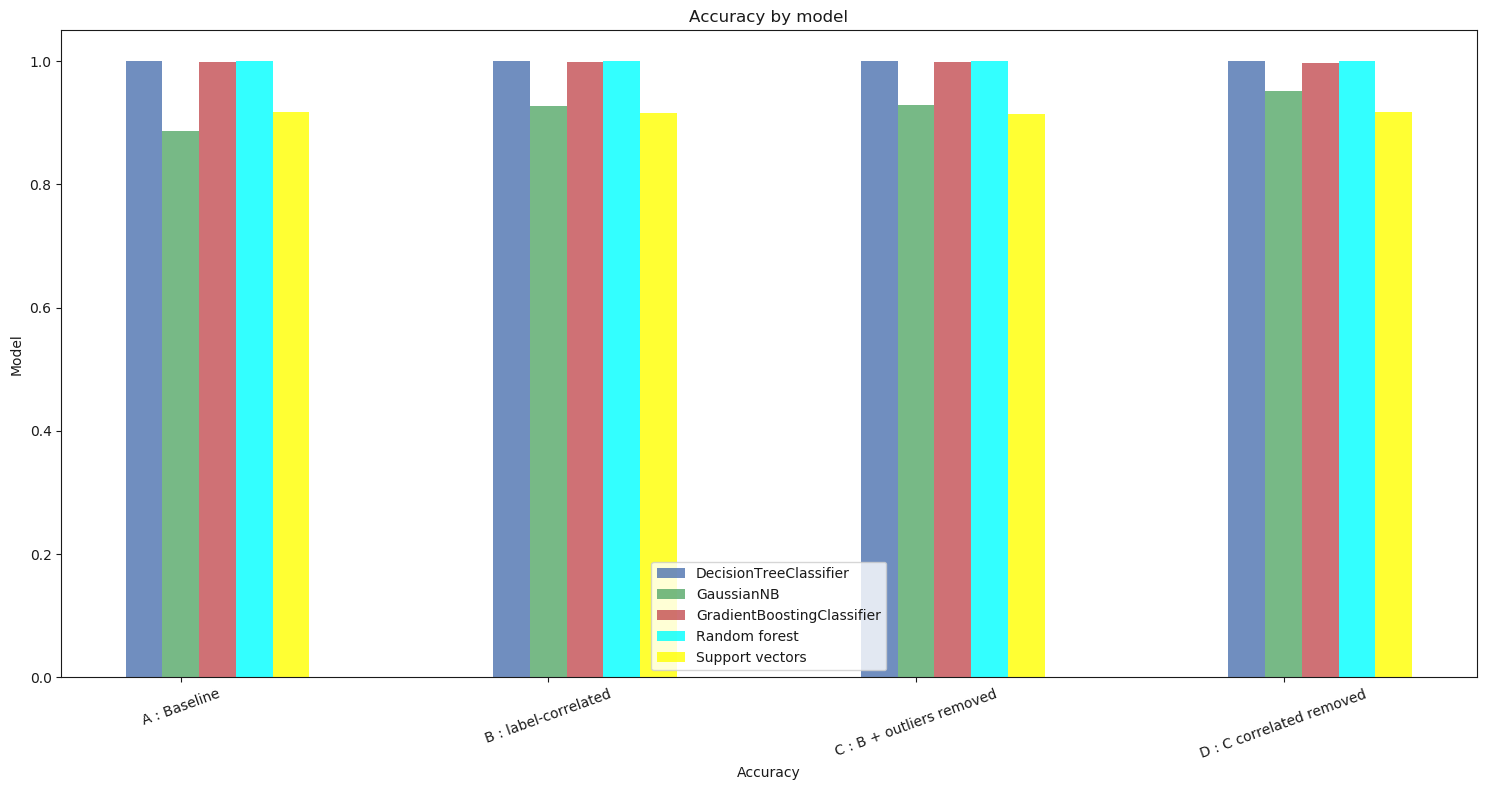

In [53]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (15,8)

# data to plot
n_groups = 4

DecisionTreeClassifier = accuracies['DecisionTreeClassifier']['train']
GaussianNB = accuracies['GaussianNB']['train']
GradientBoostingClassifier = accuracies['GradientBoostingClassifier']['train']
rand_forest_ = accuracies['rand_forest']['train']
svc = accuracies['svc']['train']


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.10
opacity = 0.8
 
rects1 = plt.bar(index, DecisionTreeClassifier, bar_width,
                 alpha=opacity,
                 color='b',
                 label='DecisionTreeClassifier')
 
rects2 = plt.bar(index + bar_width, GaussianNB, bar_width,
                 alpha=opacity,
                 color='g',
                 label='GaussianNB')

rects3 = plt.bar(index + 2 * bar_width, GradientBoostingClassifier, bar_width,
                 alpha=opacity,
                 color='r',
                 label='GradientBoostingClassifier')

rects4 = plt.bar(index + 3 * bar_width, rand_forest_, bar_width,
                 alpha=opacity,
                 color='cyan',
                 label='Random forest')

rects5 = plt.bar(index + 4 * bar_width, svc, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Support vectors')


plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy by model')
plt.xticks(index + bar_width, ('A : Baseline', 'B : label-correlated', 'C : B + outliers removed', 'D : C correlated removed'))
plt.legend()
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

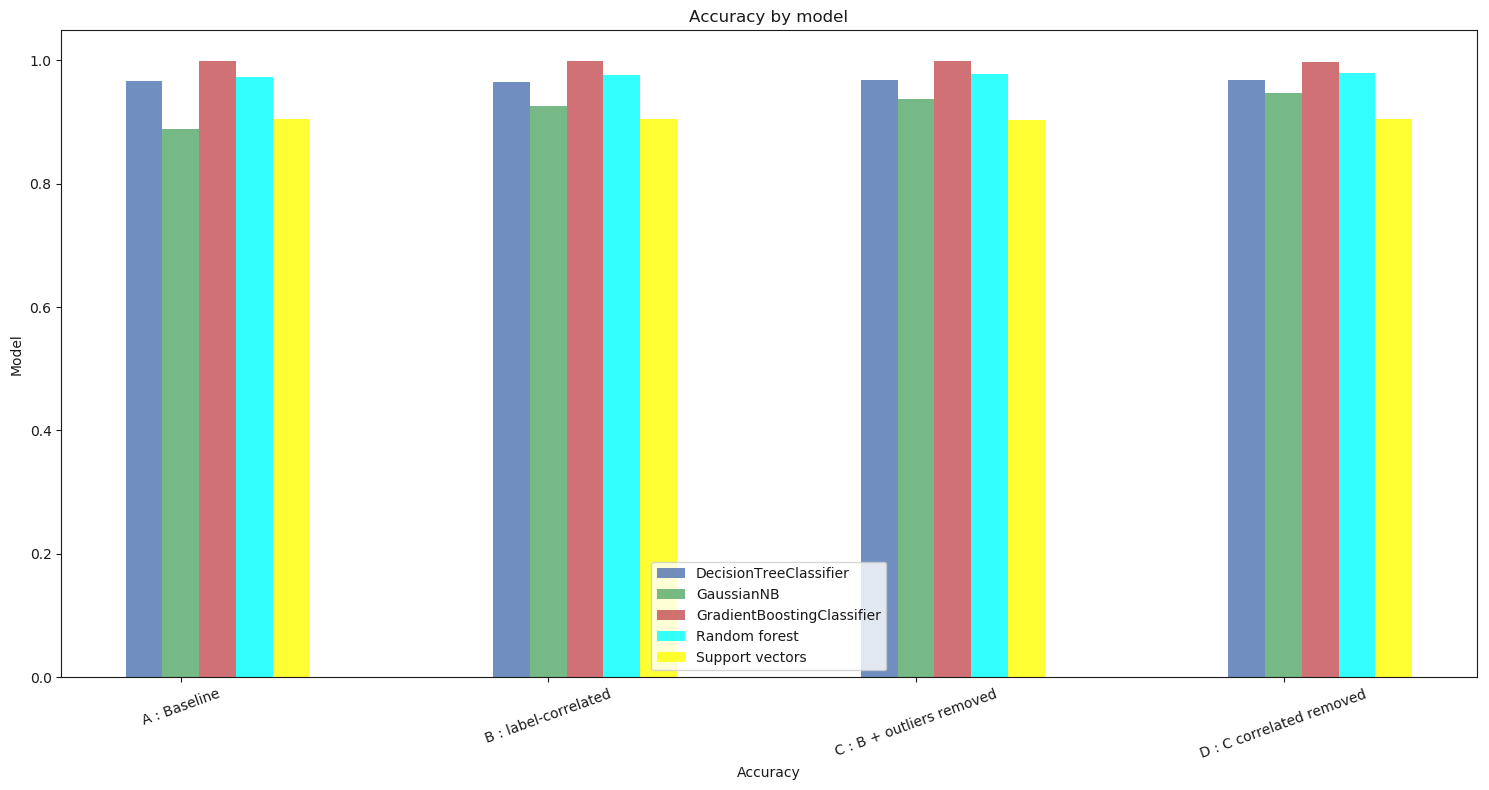

In [54]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (15,8)

# data to plot
n_groups = 4

DecisionTreeClassifier = accuracies['DecisionTreeClassifier']['test']
GaussianNB = accuracies['GaussianNB']['test']
# GradientBoostingClassifier = accuracies['GradientBoostingClassifier']['test']
rand_forest_ = accuracies['rand_forest']['test']
svc = accuracies['svc']['test']


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.10
opacity = 0.8
 
rects1 = plt.bar(index, DecisionTreeClassifier, bar_width,
                 alpha=opacity,
                 color='b',
                 label='DecisionTreeClassifier')
 
rects2 = plt.bar(index + bar_width, GaussianNB, bar_width,
                 alpha=opacity,
                 color='g',
                 label='GaussianNB')

rects3 = plt.bar(index + 2 * bar_width, GradientBoostingClassifier, bar_width,
                 alpha=opacity,
                 color='r',
                 label='GradientBoostingClassifier')

rects4 = plt.bar(index + 3 * bar_width, rand_forest_, bar_width,
                 alpha=opacity,
                 color='cyan',
                 label='Random forest')

rects5 = plt.bar(index + 4 * bar_width, svc, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Support vectors')


plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy by model')
plt.xticks(index + bar_width, ('A : Baseline', 'B : label-correlated', 'C : B + outliers removed', 'D : C correlated removed'))
plt.legend()
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

In [55]:
print("Support vector machines validation Score: ",svmclf.score(X_val[cols],y_val))

print("Bernoulli naive bayes validation Score: ",clf.score(X_val[cols],y_val))

print("Gaussian naive bayes validation Score: ", gnb.score(X_val[cols],y_val))

print("Decision Tree Classification validation Score: ",dec_tree.score(X_val[cols],y_val))

print("Random Forest Classification validation Score: ", rand_forest.score(X_val[cols],y_val))

print("Gradient Boosting Classifier validation Score: ",gbc.score(X_val[cols],y_val))



Support vector machines validation Score:  0.9242902208201893
Bernoulli naive bayes validation Score:  0.526813880126183
Gaussian naive bayes validation Score:  0.9542586750788643
Decision Tree Classification validation Score:  0.9558359621451105
Random Forest Classification validation Score:  0.9763406940063092
Gradient Boosting Classifier validation Score:  0.9763406940063092
